# 1. Introduction

## 1.1 Datasets

### In this file we'll model with our three different datasets that we prepared in the first file:

#### 1. The kitchen sink (all data, all levels)
#### 2. Hand engineered features (reduced levels)
#### 3. Hand engineered features with features hand selected

## 1.2 Modelling approaches

### We'll model using two approaches: a penalised logistic regression and a tree-based method. Both of these methods have their advantages and disadvantages. 

### The logistic regression gives coefficients that determine exactly how important each feature is, but is incapable of automatically finding interactions. Tree based methods are good at finding interactions but the importance measure is based upon how many times the variable was "split" on and so this measure of importance is less exact than in the GLM

## 1.3 Data splitting

### Training will be conducted by splitting the data into two partitions: train (80%) and test (20%).
### If we had more data we'd use a train:60%, val:20%, test:20% split, using the test split to evaluate model design before finally testing on test. 

### Instead of this, we'll use 5 fold cross validation to perform model design before testing right at the end

### Cross validation will also give us a distribution of model performance rather than just a point estimate

## 1.4 Model evaluation

### We'll evaluate our models' performance using a confusion matrix and Area under the ROC curve. 

# 2. Libraries

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix

# 3. Load the data

### 3.1 Kitchen sink 

In [67]:
hd_data_ks = pd.read_csv('../data/cleaned/kitchen_sink.csv')

In [68]:
hd_data_ks.shape

(284, 26)

### 3.2 Hand tuned

In [70]:
hd_data_ht = pd.read_csv('../data/cleaned/hand_tuned.csv')

In [71]:
hd_data_ht.shape

(284, 21)

### 3.3 Hand tuned,feature selected

In [109]:
hd_data_ht_cd = pd.read_csv('../data/cleaned/hand_tuned_feature_selected.csv')

In [110]:
hd_data_ht_cd.shape

(284, 17)

# 4. Split the data into an 80/20 split

In [335]:
ht_cd_shuff = hd_data_ht_cd.sample(frac=1)
ht_cd_shuff_train, ht_cd_shuff_test = np.split(ht_cd_shuff, [int(.8*len(ht_cd_shuff))])
ht_cd_shuff_train.shape

(227, 17)

In [336]:
ht_cd_shuff_test.shape

(57, 17)

In [278]:
ht_shuff = hd_data_ht.sample(frac=1)
ht_shuff_train, ht_shuff_test = np.split(ht_shuff, [int(.8*len(ht_shuff))])
ht_shuff_train.shape

(227, 21)

In [279]:
ks_shuff = hd_data_ks.sample(frac=1)
ks_shuff_train, ks_shuff_test = np.split(ks_shuff, [int(.8*len(ks_shuff))])
ks_shuff_train.shape

(227, 26)

# 5. Penalised log rec cv

### 5.1 Hand tuned, feature selected dataset

In [337]:
p_logr = LogisticRegressionCV(cv = 5, penalty = 'l1', solver = "liblinear",scoring = "roc_auc", n_jobs = -1, 
                              verbose =1, max_iter=1000,refit=True)

In [338]:
ht_cd_shuff_train["num"] = ht_cd_shuff_train["num"].astype('bool')

In [339]:
np_ht_cd_shuff_train = ht_cd_shuff_train.to_numpy()
np_ht_cd_shuff_test =  ht_cd_shuff_test.to_numpy()

In [310]:
x = np_ht_cd_shuff_train[:,0:16]
y = np_ht_cd_shuff_train[:,16]
y=y.astype('bool')

In [347]:
x_ = np_ht_cd_shuff_test[:,0:16]
y_ = np_ht_cd_shuff_test[:,16]
y_=y_.astype('bool')

### 5.1.1 Cross validated CV to get performance distribution

In [351]:
scores = cross_val_score(p_logr, x, y, cv=5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

In [352]:
scores

array([0.92115385, 0.84807692, 0.93      , 0.886     , 0.952     ])

In [353]:
scores.mean()

0.9074461538461538

### 5.1.2 Re-run to get coefficients

In [354]:
p_logr.fit(x,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


LogisticRegressionCV(cv=5, max_iter=1000, n_jobs=-1, penalty='l1',
                     scoring='roc_auc', solver='liblinear', verbose=1)

In [355]:
 len(p_logr.coef_[0])

16

In [356]:
len(y_)

57

### 5.1.4 Performance on held out test set

In [358]:
sklearn.metrics.roc_auc_score(y_, p_logr.predict(x_))

0.858560794044665

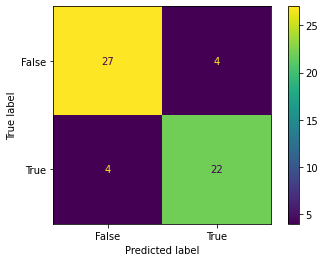

In [361]:
plot_confusion_matrix(p_logr, x_, y_) 

### 5.1.5 Coefficient values

In [362]:
features = ht_cd_shuff_train.columns.tolist()[:-1]

dict = {'feature': features, 'coef': p_logr.coef_[0]}  
df = pd.DataFrame(dict) 

df.sort_values(by=['coef'])

,feature,coef
14,thal_3,-1.423517
12,slope_1,-0.779050
6,cp_1_3,-0.527364
8,restecg_0,-0.332798
10,exang_False,-0.212212
4,sex_False,-0.209435
0,age,-0.008949
1,thalach,-0.003616
5,sex_True,0.076261
15,thal_6_7,0.175225


### 5.2 Hand tuned dataset (no feature selection)

In [379]:
ht_shuff_train["num"] = ht_shuff_train["num"].astype('bool')

In [392]:
np_ht_shuff_train = ht_shuff_train.to_numpy()
np_ht_shuff_test =  ht_shuff_test.to_numpy()

In [393]:
x = np_ht_shuff_train[:,0:20]
y = np_ht_shuff_train[:,20]
y=y.astype('bool')

In [394]:
x_ = np_ht_shuff_test[:,0:20]
y_ = np_ht_shuff_test[:,20]
y_=y_.astype('bool')

In [395]:
p_logr = LogisticRegressionCV(cv = 5, penalty = 'l1', solver = "liblinear",scoring = "roc_auc", n_jobs = -1, 
                              verbose =1, max_iter=1000,refit=True)

In [396]:
scores_ht = cross_val_score(p_logr, x, y, cv=5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

In [397]:
scores_ht

array([0.96      , 0.87809524, 0.908     , 0.95039683, 0.86309524])

In [398]:
scores_ht.mean()

0.9119174603174602

### 5.2.2 Re-run to get coefficients

In [399]:
p_logr.fit(x,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


LogisticRegressionCV(cv=5, max_iter=1000, n_jobs=-1, penalty='l1',
                     scoring='roc_auc', solver='liblinear', verbose=1)

In [400]:
sklearn.metrics.roc_auc_score(y, p_logr.predict(x))

0.8639383989993745

In [401]:
features = ht_shuff_train.columns.tolist()[:-1]

dict = {'feature': features, 'coef': p_logr.coef_[0]}  
df = pd.DataFrame(dict) 

df.sort_values(by=['coef'])

,feature,coef
8,cp_1_3,-1.230146
18,thal_3,-1.077757
6,sex_False,-0.883849
14,exang_False,-0.230961
16,slope_1,-0.193917
3,thalach,-0.024487
0,age,-0.000957
17,slope_2_3,0.000000
15,exang_True,0.000000
13,restecg_1_2,0.000000


### Hold out performance

0.7922077922077922


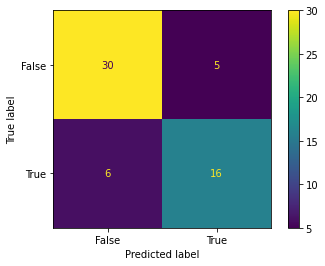

In [438]:
print(sklearn.metrics.roc_auc_score(y_, p_logr.predict(x_)))
plot_confusion_matrix(p_logr, x_, y_) 

### 5.3 Kitchen sink dataset

In [296]:
ks_shuff_train["num"] = ks_shuff_train["num"].astype('bool')

In [403]:
np_ks_shuff_train = ks_shuff_train.to_numpy()
np_ks_shuff_test =  ks_shuff_test.to_numpy()

In [427]:
x = np_ks_shuff_train[:,0:25]
y = np_ks_shuff_train[:,25]
y=y.astype('bool')

In [428]:
x_ = np_ks_shuff_test[:,0:25]
y_ = np_ks_shuff_test[:,25]
y_=y_.astype('bool')

In [429]:
x.shape

(227, 25)

In [430]:
p_logr = LogisticRegressionCV(cv = 5, penalty = 'l1', solver = "liblinear",scoring = "roc_auc", n_jobs = -1, 
                              verbose =1, max_iter=1000,refit=True)

In [431]:
scores_ks = cross_val_score(p_logr, x, y, cv=5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

In [432]:
scores_ks

array([0.91619048, 0.88380952, 0.89087302, 0.86507937, 0.90277778])

In [433]:
scores_ks.mean()

0.8917460317460317

In [435]:
p_logr.fit(x,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


LogisticRegressionCV(cv=5, max_iter=1000, n_jobs=-1, penalty='l1',
                     scoring='roc_auc', solver='liblinear', verbose=1)

In [437]:
features = ks_shuff_train.columns.tolist()[:-1]

dict = {'feature': features, 'coef': p_logr.coef_[0]}  
df = pd.DataFrame(dict) 

df.sort_values(by=['coef'])

,feature,coef
6,sex_False,-0.707722
17,exang_False,-0.364020
19,slope_1.0,-0.207833
22,thal_3.0,-0.169214
10,cp_3.0,-0.128779
14,restecg_0.0,-0.109312
0,age,-0.030019
3,thalach,-0.027534
21,slope_3.0,0.000000
20,slope_2.0,0.000000


### Hold out performance

0.7922077922077922


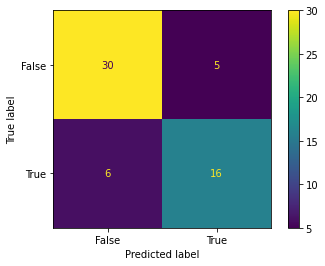

In [439]:
print(sklearn.metrics.roc_auc_score(y_, p_logr.predict(x_)))
plot_confusion_matrix(p_logr, x_, y_) 